## **Install**

### Firedrake

In [1]:
try:
    !wget "https://fem-on-colab.github.io/releases/firedrake-install-release-real.sh" -O "/tmp/firedrake-install.sh"
    !bash "/tmp/firedrake-install.sh"
    from firedrake import *  # noqa: F401
except:
    from firedrake import *  # noqa: F401

--2025-12-15 18:17:09--  https://fem-on-colab.github.io/releases/firedrake-install-release-real.sh
Resolving fem-on-colab.github.io (fem-on-colab.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to fem-on-colab.github.io (fem-on-colab.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4767 (4.7K) [application/x-sh]
Saving to: ‘/tmp/firedrake-install.sh’

/tmp/firedrake-inst 100%[===================>]   4.66K  --.-KB/s    in 0s      

2025-12-15 18:17:09 (44.1 MB/s) - ‘/tmp/firedrake-install.sh’ saved [4767/4767]

+ INSTALL_PREFIX=/usr/local
++ echo /usr/local
++ awk -F/ '{print NF-1}'
+ INSTALL_PREFIX_DEPTH=2
+ PROJECT_NAME=fem-on-colab
+ SHARE_PREFIX=/usr/local/share/fem-on-colab
+ FIREDRAKE_INSTALLED=/usr/local/share/fem-on-colab/firedrake.installed
+ [[ ! -f /usr/local/share/fem-on-colab/firedrake.installed ]]
+ PYBIND11_INSTALL_SCRIPT_PATH=https://github.com/fem-on-colab/fem-on-colab.github.io/raw/1f62

### Other

In [2]:
import matplotlib.pyplot as plt

## **Functions**

### Burgers

In [8]:
def burgers(h=2**-10, degree=0, nu=0, timestep=2**-6, end_time=1.0):
    mesh = UnitIntervalMesh(round(1/h))
    n = FacetNormal(mesh)
    x, = SpatialCoordinate(mesh)

    V = FunctionSpace(mesh, "DG", degree)
    u_ = Function(V, name="VelocityOld")
    u = Function(V, name="Velocity")
    v = TestFunction(V)

    ic = project((
        conditional(le(abs(x - 0.25), 0.125), 1, 0)
      + conditional(le(abs(x - 0.75), 0.125), - 0.5, 0)
    ), V)

    u_.assign(ic)
    u.assign(ic)

    jump = lambda u: -2 * avg(u * n[0])

    F = (
        inner((u - u_)/timestep, v) * dx
        + 2/3 * inner(avg(u) * jump(u), avg(v)) * dS
        + 1/3 * inner(avg(u * v), jump(u)) * dS
        + 0.5 * inner(jump(u), jump(v)) * dS
    )
    if degree != 0:
        F += inner(u * u.dx(0), v) * dx
    if nu != 0:
        F += nu * inner(u.dx(0), v.dx(0)) * dx
    if degree != 0 and nu != 0:
        F += (
            inner(avg(u.dx(0)), jump(v))
          + inner(jump(u), avg(v.dx(0)))
        ) * dS

    sp = {
        "snes_monitor": None,
        "snes_converged_reason": None,
        "snes_max_it": 100,
        # "snes_type" : "newtonls",
        # "snes_linesearch_type" : "bt",
    }

    t = 0.0
    while t < end_time:
        t += timestep
        print(GREEN % f"Solving for time t = {t}:")
        solve(F == 0, u, solver_parameters=sp)
        u_.assign(u)
    print(GREEN % f"Done!")

    plt.figure(figsize=(10, 6))
    plot(u, axes=plt.gca())
    plt.title(f"Burgers Equation (t={t:.2f}, degree={degree})")
    plt.xlabel("x")
    plt.ylabel("u")
    plt.grid(True)
    plt.show()

Solving for time t = 0.015625:
  0 SNES Function norm 1.243036157515e+00
  1 SNES Function norm 1.596715928844e+00
  2 SNES Function norm 3.284683370363e-01
  3 SNES Function norm 2.777659463844e-02
  4 SNES Function norm 2.099901952783e-04
  5 SNES Function norm 1.121970453832e-08
  Nonlinear petsctools_66_ solve converged due to CONVERGED_FNORM_RELATIVE iterations 5
Solving for time t = 0.03125:
  0 SNES Function norm 1.834744843799e-01
  1 SNES Function norm 9.422007083668e-02
  2 SNES Function norm 1.042166827588e-02
  3 SNES Function norm 9.692718664064e-05
  4 SNES Function norm 6.843327653017e-09
  5 SNES Function norm 8.381473930092e-16
  Nonlinear petsctools_67_ solve converged due to CONVERGED_FNORM_RELATIVE iterations 5
Solving for time t = 0.046875:
  0 SNES Function norm 1.311089840497e-01
  1 SNES Function norm 6.789222579971e-02
  2 SNES Function norm 6.785459744552e-03
  3 SNES Function norm 4.853845070650e-05
  4 SNES Function norm 1.786461282447e-09
  5 SNES Function 

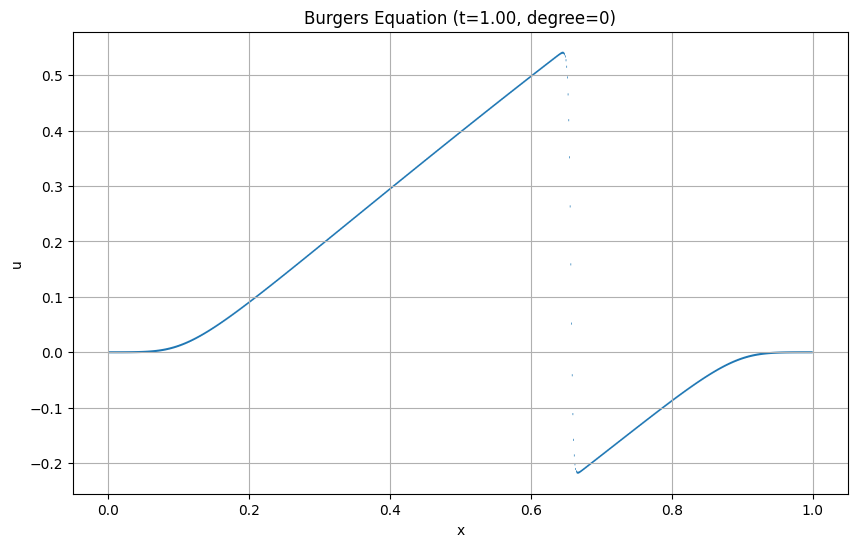

In [9]:
burgers(h=2**-10, degree=0, nu=0, timestep=2**-6, end_time=1.0)